# K-Means Clustering

* Method to segment K distinct non overlapping clusters
* Each observation belongs to a cluster with nearest cluster mean (Centroid)
* Minimizes within cluster variance/sum of squares

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.spatial.distance import euclidean
from sklearn.datasets import make_blobs

## References

* https://en.wikipedia.org/wiki/K-means_clustering
* ISLP

## Data Setup

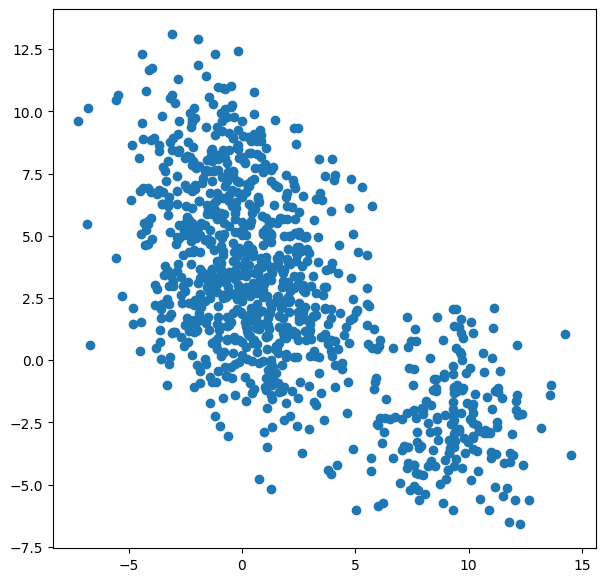

In [2]:
n_samples, n_features = 1000, 2
n_clusters = 5
X, y = make_blobs(
    n_samples=n_samples, centers=n_clusters, n_features=n_features, cluster_std=2, random_state=0
)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(x=X[:, 0], y=X[:, 1])
plt.show()

## WCSS (Within Cluster Sum Of Squares/Variance)

## Silhouette Score

## Naive K-Means 

> 1. Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations.
>
> 2. Iterate until the cluster assignments stop changing:
>
>>> (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.
>>
>>> (b) Assign each observation to the cluster whose centroid is closest (where closest is defned using Euclidean distance).

In [3]:
np.random.seed(0)

n_iters = 10
cluster_id = np.random.randint(0, n_clusters, size=X.shape[0]) # Random assignment

cluster_id_history = [cluster_id]
centroid_history = []
wcss_history = []

for iter_ in range(n_iters):
    centroids = np.random.random(size=(n_clusters, X.shape[1]))
    for i in range(n_clusters):
        cluster_batch = X[cluster_id==i]
        if len(cluster_batch) > 0:
            centroids[i,:] = cluster_batch.mean(axis=0) # finding centroids 
        
    cluster_distances = []
    for i in range(n_samples):
        sample_distances = []
        for c_idx in range(n_clusters):
            sample_distances.append(euclidean(X[i], centroids[c_idx]))
        cluster_distances.append(sample_distances)

    # Cluster ID 
    cluster_id = np.argmin(cluster_distances, axis=1)
    wcss = np.min(cluster_distances, axis=1).sum()

    if np.array_equal(cluster_id, cluster_id_history[-1]):
        cluster_id_history.pop(-1)
        print(f"Iteration : {iter_} | Early breaking as model converged")
        break
    else:
        cluster_id_history.append(cluster_id)
        centroid_history.append(centroids)
        wcss_history.append(wcss)
    

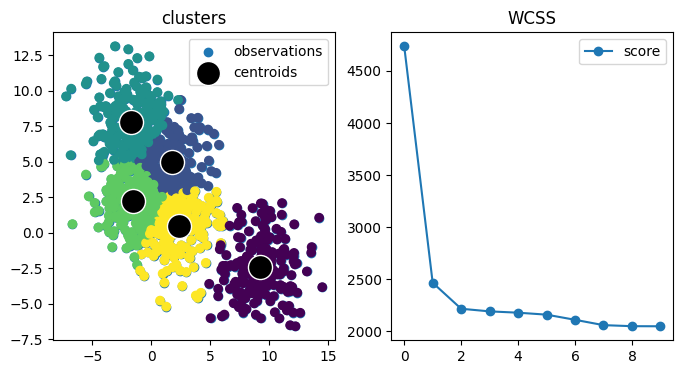

In [4]:

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(x=X[:, 0], y=X[:, 1], label="observations")
ax[0].scatter(x=X[:, 0], y=X[:, 1], c=cluster_id)
ax[0].scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    color="black",
    marker="o",
    s=300,
    edgecolor="white",
    label="centroids"
)
ax[0].set_title("clusters")
ax[0].legend()

ax[1].plot(wcss_history,"o-", label="score")
ax[1].set_title("WCSS")
ax[1].legend()


plt.show()

### Animation

In [5]:
from utility import cluster_animation

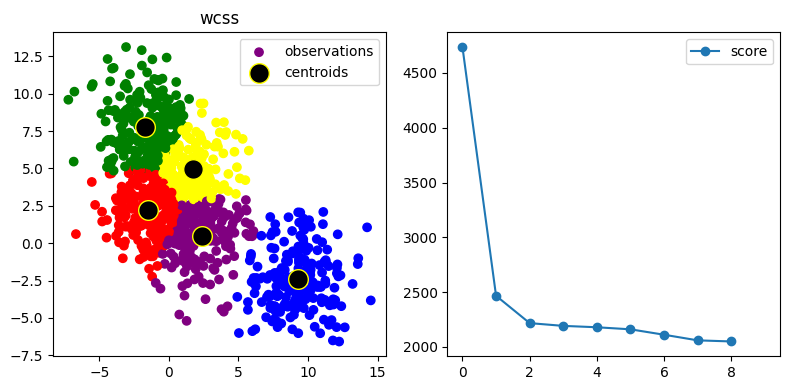

In [6]:
cluster_animation(
    X=X,
    cluster_id_history=cluster_id_history,
    cluster_centroids_history=centroid_history,
    wcss_history=wcss_history,
    interval=1000,
)